<a href="https://colab.research.google.com/github/kevindav22/AplikasiTaxi/blob/master/Diabetes_Uas_21_11_4501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Download Dataset**

In [1]:
import pandas as pd

# URL dataset PIMA Indian Diabetes Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Menyebutkan nama kolom sesuai dengan deskripsi dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Memuat dataset ke dalam DataFrame
data = pd.read_csv(url, names=columns)

# Menampilkan 5 baris pertama dari dataset untuk pengecekan awal
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **2. Preprocesing Data**

In [2]:
# 1.Tipe Data dan Rename Kolom
# Memeriksa tipe data setiap kolom
print(data.dtypes)

# Memberikan nama kolom yang lebih deskriptif (jika perlu)
data.rename(columns={'Pregnancies': 'Total_Pregnancies', 'Outcome': 'Diabetes_Status'}, inplace=True)

# Menampilkan nama kolom yang sudah diperbarui
print(data.columns)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Index(['Total_Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes_Status'],
      dtype='object')


In [3]:
# 2. Mengecek missing values
print(data.isnull().sum())

# Mengisi missing values pada kolom 'Insulin' dan 'SkinThickness' dengan rata-rata kolom
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

# Memeriksa kembali missing values setelah imputasi
print(data.isnull().sum())


Total_Pregnancies           0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes_Status             0
dtype: int64
Total_Pregnancies           0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes_Status             0
dtype: int64


In [4]:
# 3. Normalisasi
from sklearn.preprocessing import MinMaxScaler

# Memilih kolom numerik untuk dinormalisasi
scaler = MinMaxScaler()

# Melakukan normalisasi pada semua kolom numerik
data[['Total_Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(
    data[['Total_Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Menampilkan data setelah normalisasi
print(data.head())


   Total_Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0           0.352941  0.743719       0.590164       0.304348  0.079086   
1           0.058824  0.427136       0.540984       0.239130  0.079086   
2           0.470588  0.919598       0.524590       0.147135  0.079086   
3           0.058824  0.447236       0.540984       0.173913  0.096154   
4           0.000000  0.688442       0.327869       0.304348  0.185096   

        BMI  DiabetesPedigreeFunction       Age  Diabetes_Status  
0  0.500745                  0.234415  0.483333                1  
1  0.396423                  0.116567  0.166667                0  
2  0.347243                  0.253629  0.183333                1  
3  0.418778                  0.038002  0.000000                0  
4  0.642325                  0.943638  0.200000                1  


       Total_Pregnancies     Glucose  BloodPressure  SkinThickness  \
count         768.000000  768.000000     768.000000     768.000000   
mean            0.226180    0.607510       0.566438       0.213114   
std             0.198210    0.160666       0.158654       0.104687   
min             0.000000    0.000000       0.000000       0.000000   
25%             0.058824    0.497487       0.508197       0.147135   
50%             0.176471    0.587940       0.590164       0.173913   
75%             0.352941    0.704774       0.655738       0.271739   
max             1.000000    1.000000       1.000000       1.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  \
count  768.000000  768.000000                768.000000  768.000000   
mean     0.125793    0.476790                  0.168179    0.204015   
std      0.111875    0.117499                  0.141473    0.196004   
min      0.000000    0.000000                  0.000000    0.000000   
25%      0.079

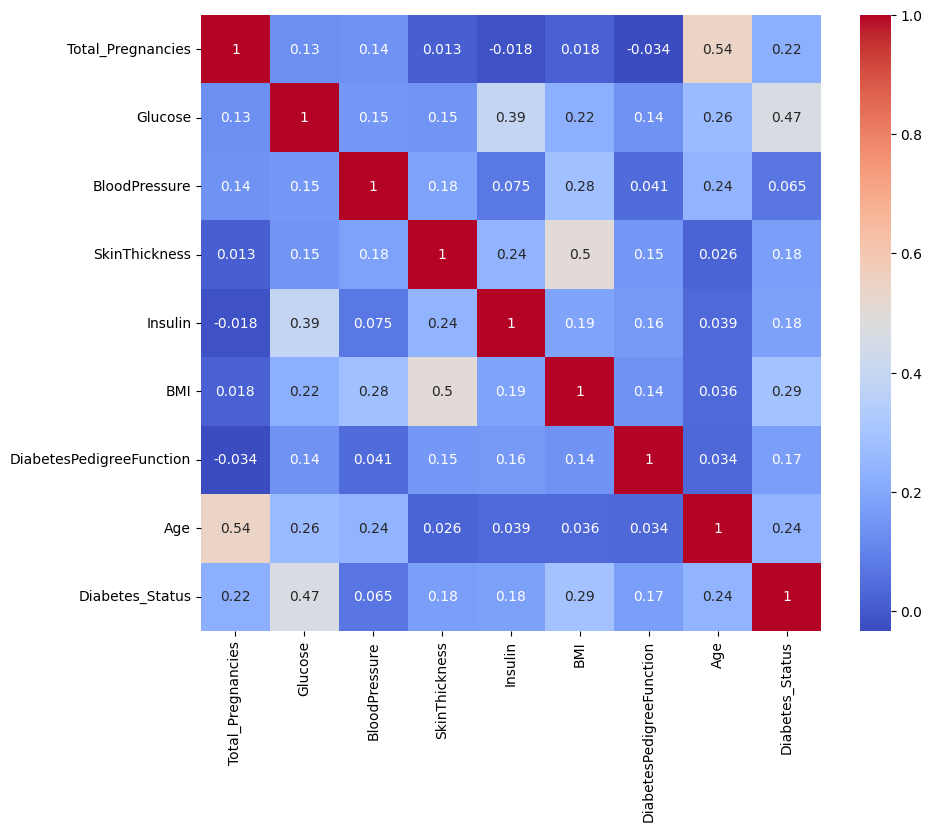

In [5]:
# 4. Menghitung statistik deskriptif
print(data.describe())

# Menghitung matriks korelasi antar fitur
correlation_matrix = data.corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

# Menampilkan heatmap dari matriks korelasi untuk visualisasi yang lebih baik
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### **3. Eksploratory Data Analys EDA**

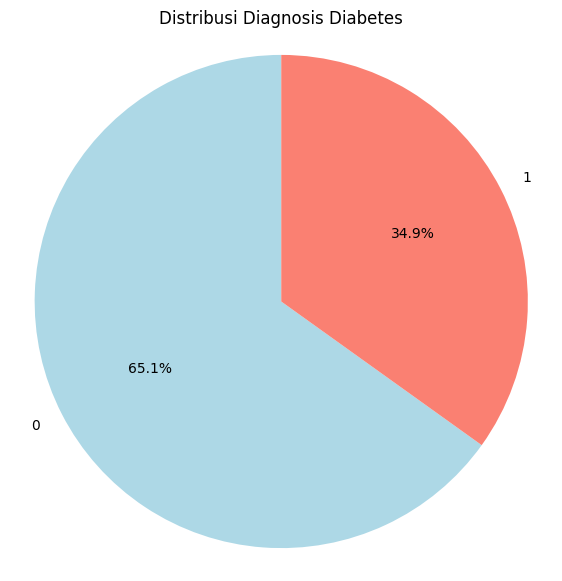

In [7]:
# 1. PIE CHART
# Menghitung distribusi status diagnosis diabetes
status_count = data['Diabetes_Status'].value_counts()

# Membuat Pie Chart untuk distribusi diabetes
plt.figure(figsize=(7, 7))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90)
plt.title('Distribusi Diagnosis Diabetes')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.show()


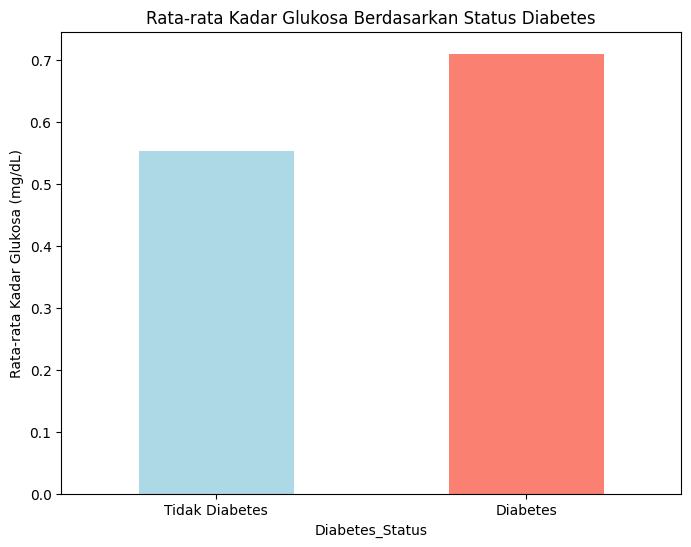

In [8]:
# 1. BAR CHART
# Menghitung rata-rata kadar glukosa berdasarkan status diabetes
avg_glucose = data.groupby('Diabetes_Status')['Glucose'].mean()

# Membuat Bar Chart
plt.figure(figsize=(8, 6))
avg_glucose.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Rata-rata Kadar Glukosa Berdasarkan Status Diabetes')
plt.ylabel('Rata-rata Kadar Glukosa (mg/dL)')
plt.xticks([0, 1], ['Tidak Diabetes', 'Diabetes'], rotation=0)
plt.show()


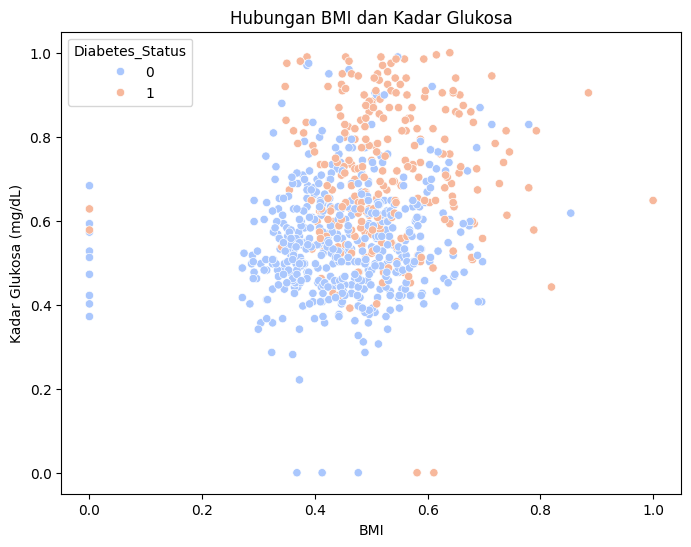

In [9]:
# Membuat Scatter Plot untuk melihat hubungan antara BMI dan Glucose
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Diabetes_Status', palette='coolwarm', data=data)
plt.title('Hubungan BMI dan Kadar Glukosa')
plt.xlabel('BMI')
plt.ylabel('Kadar Glukosa (mg/dL)')
plt.show()


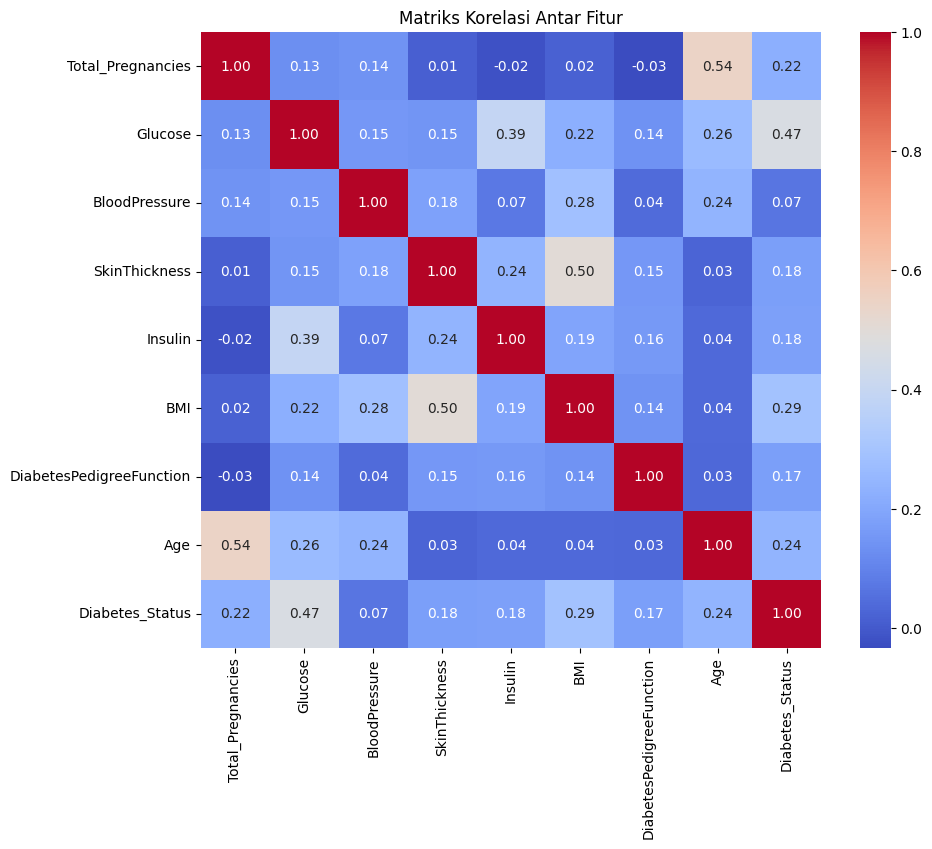

In [10]:
# Membuat Matriks Korelasi
correlation_matrix = data.corr()

# Menampilkan heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()


### **4. Fitur Yang Dipilih**

In [11]:
# Memilih fitur yang relevan berdasarkan hasil EDA
selected_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Diabetes_Status']

# Membuat dataset baru yang hanya berisi fitur-fitur yang dipilih
data_selected = data[selected_features]

# Menampilkan 5 baris pertama dataset yang sudah dipilih fiturnya
data_selected.head()


,Glucose,BMI,Age,DiabetesPedigreeFunction,Diabetes_Status
0,0.743719,0.500745,0.483333,0.234415,1
1,0.427136,0.396423,0.166667,0.116567,0
2,0.919598,0.347243,0.183333,0.253629,1
3,0.447236,0.418778,0.000000,0.038002,0
4,0.688442,0.642325,0.200000,0.943638,1


### **5. Model yang digunakan**

In [12]:
# Memisahkan fitur dan target
X = data_selected.drop(columns=['Diabetes_Status'])  # Fitur
y = data_selected['Diabetes_Status']  # Target

# Membagi data menjadi data pelatihan dan pengujian (80% untuk pelatihan, 20% untuk pengujian)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import model yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# 2. Gradient Boost Tree
gbt_model = GradientBoostingClassifier(random_state=42)
gbt_model.fit(X_train, y_train)
gbt_predictions = gbt_model.predict(X_test)

# 3. Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# 4. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Evaluasi Model
def evaluate_model(model_name, y_test, predictions):
    print(f"Model: {model_name}")
    print(f"AUC: {roc_auc_score(y_test, predictions)}")
    print(f"Akurasi: {accuracy_score(y_test, predictions)}")
    print(f"F1 Score: {f1_score(y_test, predictions)}")
    print(f"Precision: {precision_score(y_test, predictions)}")
    print(f"Recall: {recall_score(y_test, predictions)}")
    print("\n")

# Evaluasi setiap model
evaluate_model("Random Forest", y_test, rf_predictions)
evaluate_model("Gradient Boost Tree", y_test, gbt_predictions)
evaluate_model("SVM", y_test, svm_predictions)
evaluate_model("KNN", y_test, knn_predictions)


Model: Random Forest
AUC: 0.7535353535353535
Akurasi: 0.7662337662337663
F1 Score: 0.6842105263157895
Precision: 0.6610169491525424
Recall: 0.7090909090909091


Model: Gradient Boost Tree
AUC: 0.7080808080808081
Akurasi: 0.7337662337662337
F1 Score: 0.6238532110091743
Precision: 0.6296296296296297
Recall: 0.6181818181818182


Model: SVM
AUC: 0.7383838383838384
Akurasi: 0.7727272727272727
F1 Score: 0.6601941747572816
Precision: 0.7083333333333334
Recall: 0.6181818181818182


Model: KNN
AUC: 0.7686868686868688
Akurasi: 0.7857142857142857
F1 Score: 0.7027027027027027
Precision: 0.6964285714285714
Recall: 0.7090909090909091





### **6. Hyperparameter Tuning**

In [13]:
from sklearn.model_selection import GridSearchCV

# Tentukan parameter yang ingin dioptimalkan
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [10, 20, None],  # Kedalaman maksimal setiap pohon
}

# Melakukan Grid Search untuk Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari Grid Search
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Cross-validation Score for Random Forest:", rf_grid_search.best_score_)

# Menggunakan parameter terbaik untuk evaluasi model
rf_best_model = rf_grid_search.best_estimator_
rf_best_predictions = rf_best_model.predict(X_test)

# Evaluasi model terbaik setelah tuning
evaluate_model("Random Forest (Tuned)", y_test, rf_best_predictions)

Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}
Best Cross-validation Score for Random Forest: 0.7573770491803279
Model: Random Forest (Tuned)
AUC: 0.7575757575757576
Akurasi: 0.7662337662337663
F1 Score: 0.6896551724137931
Precision: 0.6557377049180327
Recall: 0.7272727272727273




In [14]:
# Tentukan parameter yang ingin dioptimalkan
gbt_param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Kedalaman maksimal pohon
}

# Melakukan Grid Search untuk Gradient Boost Tree
gbt_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gbt_param_grid, cv=5, scoring='accuracy')
gbt_grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari Grid Search
print("Best Parameters for Gradient Boost Tree:", gbt_grid_search.best_params_)
print("Best Cross-validation Score for Gradient Boost Tree:", gbt_grid_search.best_score_)

# Menggunakan parameter terbaik untuk evaluasi model
gbt_best_model = gbt_grid_search.best_estimator_
gbt_best_predictions = gbt_best_model.predict(X_test)

# Evaluasi model terbaik setelah tuning
evaluate_model("Gradient Boost Tree (Tuned)", y_test, gbt_best_predictions)

Best Parameters for Gradient Boost Tree: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Cross-validation Score for Gradient Boost Tree: 0.7736238837798214
Model: Gradient Boost Tree (Tuned)
AUC: 0.7080808080808081
Akurasi: 0.7337662337662337
F1 Score: 0.6238532110091743
Precision: 0.6296296296296297
Recall: 0.6181818181818182


